# Loading and understanding the data 

### Load The Data Set Using Pandas

In [73]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")

### Displaying the 1st 5 rows of the dataset

In [74]:
""" head() is used to display the frist 5 rows of the dataset, we can specify the number of rows by passing argument to head()
like head(10) will display the 1st 10 rows"""
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Find the number of rows and columns

In [75]:
"""shape method is used to find the shape of the dataset (the number of rows , the number of columns)"""
df.shape

(1000, 8)

In [76]:
""" It returns the total number of entries in the data set """
df.size

8000

### List all column names and their data types.


In [77]:
""" dtpyes function is used to find the name of columns along with their Dtypes"""
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


### Use .info() to understand data types and memory usage.


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Use .describe() for summary stats of numeric columns.

In [79]:
""" describe() function is used to find the summary of statistic like count, mean, standard deviation, minimum 
maximum , Quartiles of columns with numeric values"""
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Cleaning

### check for and display any missing values.

In [80]:
""" df.isnull().sum() counts the number of missing (null) values in each column."""
missing_value = df.isnull().sum()
missing_value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [81]:
""" This lines prints the columns where there is any missing value and in this dataset
as there is no missing value, it prints nothing in the series"""
print(missing_value[missing_value>0])

Series([], dtype: int64)


### Remove duplicates (if any).

In [82]:
""" drop_duplicates is used to remove the duplicates as in this column there are no duplicates 
therefore it returns the same dataset after applying this operation"""

df.drop_duplicates().size == df.size

""" we can verify that there are no duplicates by using the comparison operator that whether the size 
before removing duplicates and after removing duplicates is equal"""

' we can verify that there are no duplicates by using the comparison operator that whether the size \nbefore removing duplicates and after removing duplicates is equal'

### Rename the columns:


#### Replace spaces with underscores.


#### Lowercase all column names.
 #### Example: "math score" → math_score


In [83]:
""" rename() is used to rename the columns 
 inplace = True apply the changes directly df"""

df.rename(columns={
    'math score': 'math_score',
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Convert "gender" to numeric (female → 0, male → 1).

In [84]:
df['gender'] = df['gender'].str.strip().str.lower()  # Clean the values
df['gender'] = df['gender'].map({'male': 1, 'female': 0})  # Now map
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


### Standardize values in "lunch" column to lowercase (e.g., Standard, standard → standard).

In [85]:
""" df[lunch] is used to access the lunch column and str is used to accesses string methods for each element in the column.
and lower() is string method used to lowercase the string"""

df['lunch'] = df['lunch'].str.lower()
df['lunch']

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object

# Data Manipulation


### Create a new column: total_score = sum of math, reading, and writing scores.

In [86]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,0,group B,bachelor's degree,standard,none,72,72,74,218
1,0,group C,some college,standard,completed,69,90,88,247
2,0,group B,master's degree,standard,none,90,95,93,278
3,1,group A,associate's degree,free/reduced,none,47,57,44,148
4,1,group C,some college,standard,none,76,78,75,229


### Create average_score = total_score / 3.


In [87]:
""" astype(int) is used to convert the datatype of the column entries into int """
df['average_score'] = (df['total_score']/3).astype(int)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,standard,none,72,72,74,218,72
1,0,group C,some college,standard,completed,69,90,88,247,82
2,0,group B,master's degree,standard,none,90,95,93,278,92
3,1,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,1,group C,some college,standard,none,76,78,75,229,76


### Create a grade column:
#### A (90+), B (80–89), C (70–79), D (60–69), F (<60)
#### Based on average_score


In [109]:
# Define a function for assigning grades
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply function to the 'average_score' column
df['grade'] = df['average_score'].apply(assign_grade)
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,grade,gender_label
0,0,group B,bachelor's degree,standard,none,72,72,74,218,72,C,Female
1,0,group C,some college,standard,completed,69,90,88,247,82,B,Female
2,0,group B,master's degree,standard,none,90,95,93,278,92,A,Female
3,1,group A,associate's degree,free/reduced,none,47,57,44,148,49,F,Male
4,1,group C,some college,standard,none,76,78,75,229,76,C,Male


### Filter out students who got less than 40 in any subject.
all those students will be excluded who got less than 40 in any subject

In [110]:
filtered_df = df[(df['math_score'] >= 40) & (df['reading_score'] >= 40) & (df['writing_score'] >= 40)]

# View the result
filtered_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,grade,gender_label
0,0,group B,bachelor's degree,standard,none,72,72,74,218,72,C,Female
1,0,group C,some college,standard,completed,69,90,88,247,82,B,Female
2,0,group B,master's degree,standard,none,90,95,93,278,92,A,Female
3,1,group A,associate's degree,free/reduced,none,47,57,44,148,49,F,Male
4,1,group C,some college,standard,none,76,78,75,229,76,C,Male


### Count how many students completed vs did not complete test preparation.

In [111]:
""" value_counts() returns the uniques number of values with count"""
df['test_preparation_course'].value_counts()


test_preparation_course
none         642
completed    358
Name: count, dtype: int64

# 📈 Bonus Visualization Tasks (Optional)

### Bar plot: Average math_score by gender.

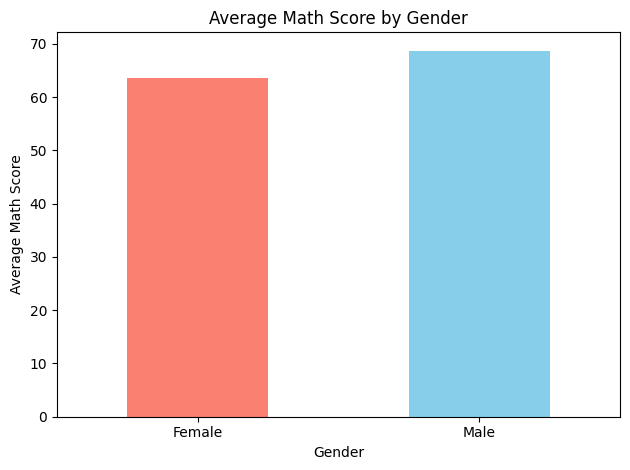

In [112]:
import matplotlib.pyplot as plt

# First, map numeric gender back to readable labels (optional but good for plots)
df['gender_label'] = df['gender'].map({0: 'Female', 1: 'Male'})

# Group by gender and calculate mean math score
avg_scores = df.groupby('gender_label')['math_score'].mean()

# Plotting
avg_scores.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Histogram: Distribution of average_score.


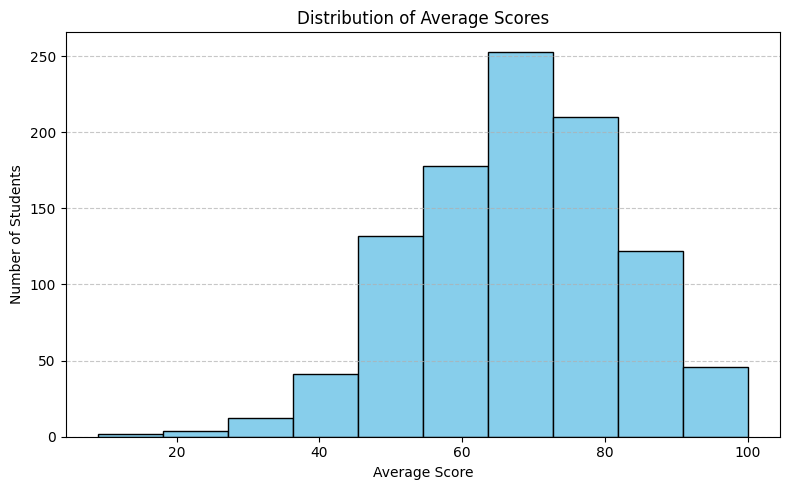

In [113]:
import matplotlib.pyplot as plt

# Plot histogram of average_score
plt.figure(figsize=(8, 5))
plt.hist(df['average_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Proportion of each grade

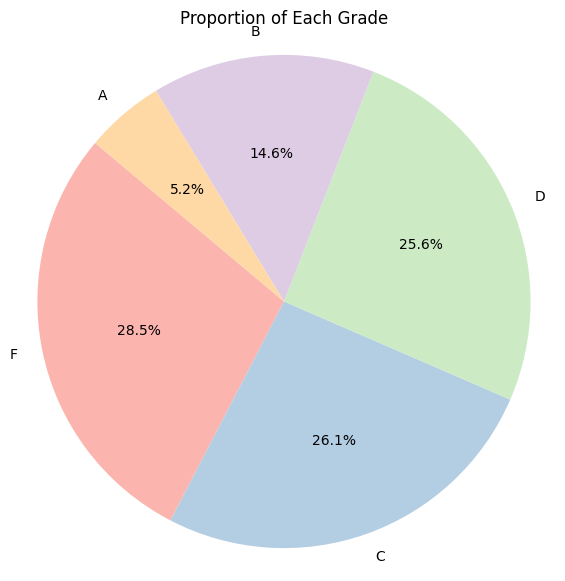

In [114]:
# Count grades
grade_counts = df['grade'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proportion of Each Grade')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()
